In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<div class="alert alert-info">
Read in the data using the https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html procedure
</div>

In [2]:
survey_data = pd.read_csv("../data/survey_data_spreadsheet_clean.csv", delimiter=",")
survey_data.head()

,field_season,date_collected,plot_id,sex,weight,species,calibrated_scale
0,2013,7/16/2013,2,F,NaN,DM,calibrated
1,2013,7/16/2013,7,M,33.0,DM,calibrated
2,2013,7/16/2013,3,M,NaN,DM,calibrated
3,2013,7/16/2013,1,M,NaN,DM,calibrated
4,2013,7/18/2013,3,M,40.0,DM,calibrated


<div class="alert alert-info">
Groupby the data  by `sex` and calculate the mean value for both groups, selecting the `weight` as variable
</div>

In [3]:
survey_data.groupby("sex").mean()['weight']

sex
F    65.510638
M    64.000000
Name: weight, dtype: float64

In [4]:
survey_data.groupby("plot_id").max()['weight']

plot_id
1     146.0
2     218.0
3     232.0
4     128.0
6      37.0
7      48.0
8      52.0
9     120.0
11    126.0
14    113.0
17    132.0
20    115.0
Name: weight, dtype: float64

Want to make a plot of the weight?

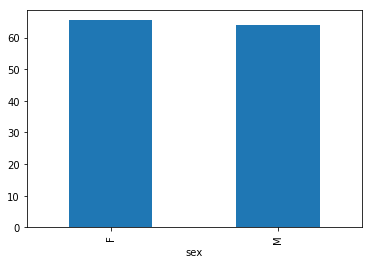

In [5]:
survey_data.groupby("sex").mean()['weight'].plot.bar()

<div class="alert alert-info">
Write the data directly linked to a plot for the report into an individual `result_sex_weight_barplot.csv` file
</div>

In [6]:
pd.DataFrame(survey_data.groupby("sex").mean()['weight']).to_csv("../data/result_sex_weight_barplot.csv")

<div class="alert alert-info">
**DONE!**
</div>

## What else?

Making interpretable , `to_datetime`

In [7]:
survey_data['date_collected'] = pd.to_datetime(survey_data['date_collected'])
survey_data.head()

,field_season,date_collected,plot_id,sex,weight,species,calibrated_scale
0,2013,2013-07-16,2,F,NaN,DM,calibrated
1,2013,2013-07-16,7,M,33.0,DM,calibrated
2,2013,2013-07-16,3,M,NaN,DM,calibrated
3,2013,2013-07-16,1,M,NaN,DM,calibrated
4,2013,2013-07-18,3,M,40.0,DM,calibrated


Now Python understands that we 're dealing with dates, we can make use of this...

In [8]:
dates_info = survey_data.loc[:2, 'date_collected'].dt

Example:

In [9]:
dates_info.month

0    7
1    7
2    7
Name: date_collected, dtype: int64

**Use the TAB-button to get more information...**

In [10]:
dates_info.weekday_name

0    Tuesday
1    Tuesday
2    Tuesday
Name: date_collected, dtype: object

Hm, let's have a look on the days that surveys were performed:

In [11]:
survey_data[survey_data['date_collected'].dt.weekday_name == 'Tuesday']  # Sunday?

,field_season,date_collected,plot_id,sex,weight,species,calibrated_scale
0,2013,2013-07-16,2,F,NaN,DM,calibrated
1,2013,2013-07-16,7,M,33.0,DM,calibrated
2,2013,2013-07-16,3,M,NaN,DM,calibrated
3,2013,2013-07-16,1,M,NaN,DM,calibrated
20,2013,2013-11-12,1,F,44.0,DO,calibrated
21,2013,2013-11-12,1,M,48.0,DO,calibrated
23,2013,2013-12-10,9,F,40.0,DO,calibrated
24,2013,2013-12-10,1,M,45.0,DO,calibrated
26,2013,2013-11-12,9,F,117.0,DS,calibrated
27,2013,2013-11-12,1,F,121.0,DS,calibrated


Would be more interesting to know the counts for each group...

In [12]:
survey_data["weekday"] = survey_data['date_collected'].dt.weekday_name
survey_data.head()

,field_season,date_collected,plot_id,sex,weight,species,calibrated_scale,weekday
0,2013,2013-07-16,2,F,NaN,DM,calibrated,Tuesday
1,2013,2013-07-16,7,M,33.0,DM,calibrated,Tuesday
2,2013,2013-07-16,3,M,NaN,DM,calibrated,Tuesday
3,2013,2013-07-16,1,M,NaN,DM,calibrated,Tuesday
4,2013,2013-07-18,3,M,40.0,DM,calibrated,Thursday


In [13]:
survey_data["weekday"].value_counts()

Wednesday    35
Tuesday      25
Thursday     21
Monday        5
Friday        1
Sunday        1
Name: weekday, dtype: int64

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DatetimeIndex.weekday.html

In [14]:
counts_weekday = survey_data['date_collected'].dt.weekday.value_counts(sort=False)
counts_weekday.loc[5] = 0

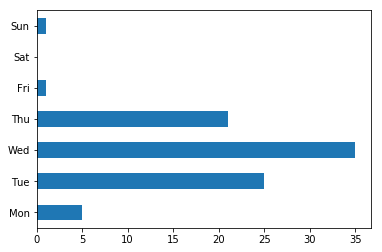

In [15]:
fig, ax = plt.subplots()
counts_weekday.sort_index().plot.barh(ax=ax)
ticks = ax.set_yticklabels(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", 'Sun'])

In [18]:
from plotnine import (ggplot, aes, geom_bar, stat_smooth, 
                      stat_boxplot, geom_point, facet_wrap)

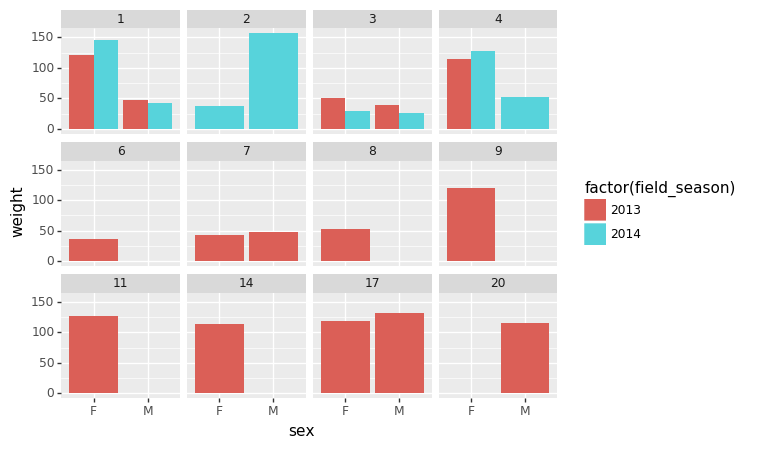

<ggplot: (-9223363286507466103)>

In [17]:
ggplot(survey_data.dropna(), aes(x='sex', y='weight', fill='factor(field_season)')) \
    + geom_bar(stat='identity', position='dodge') + facet_wrap('~plot_id')